In [23]:
# import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

# sys.path.append('../')
from tools_cv import *

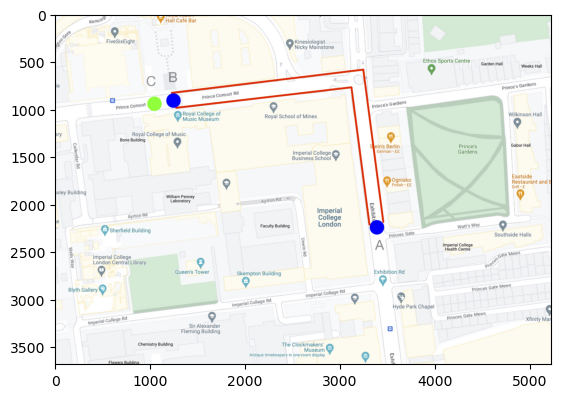

In [27]:
%matplotlib inline
img = cv2.imread('CWMap.jpg')  # BGR
show_img(img)

In [28]:
img_R = extract_color(img, 'R')
img_G = extract_color(img, 'G')
img_B = extract_color(img, 'B')

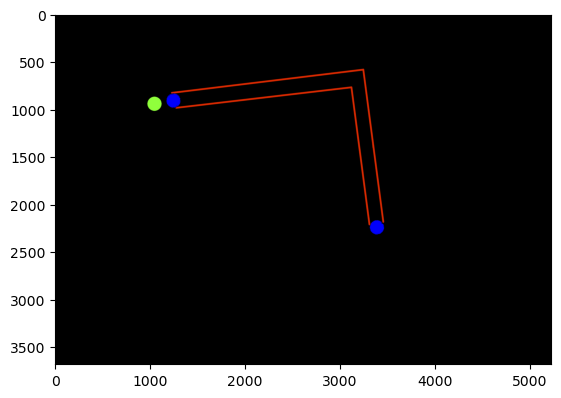

In [29]:
# show_img(img_R)
# show_img(img_G)
# show_img(img_B)
show_img(img_R + img_G + img_B)

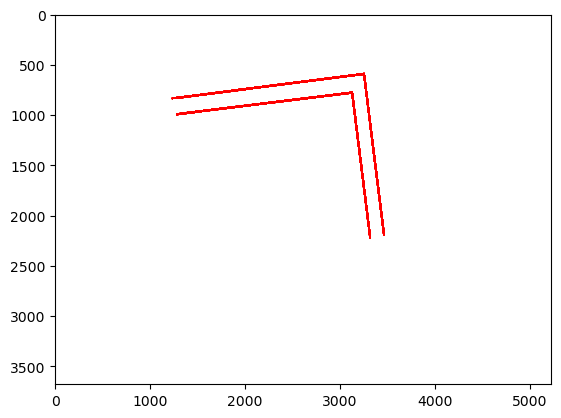

In [77]:
mask = img_R
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

R_coords = np.argwhere(mask > 0)
R_coords = R_coords.reshape((-1, 2))  # N x 2
R_coords = np.fliplr(R_coords)  # (y, x) to (x, y)

plt.scatter(R_coords[:, 0], R_coords[:, 1], c='r', s=0.1, linewidth=0.1)
plt.xlim([0, img.shape[1]])
plt.ylim([img.shape[0], 0])
plt.show()

<IPython.core.display.Javascript object>


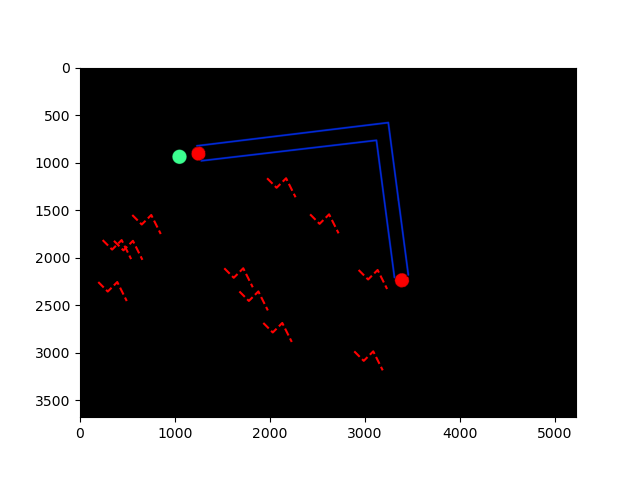

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

# Load the map image and extract the coordinates of the markers and path
map_image = plt.imread('CWMap.jpg')
marker_a = np.array([100, 100])  # example coordinates, replace with actual values
marker_b = np.array([400, 400])
marker_c = np.array([600, 200])
path_coords = np.array([[150, 150], [250, 250], [350, 150], [450, 350]])  # example coordinates, replace with actual values

# Define the initial state of the car
car_pos = marker_a
car_heading = 0.0
wheel_velocities = np.array([0.0, 0.0])  # example velocities, replace with actual values

# Define the update function for the animation
def update(frame, ax):
    # Update the state of the car based on its current position and the desired path
    # Use a feedback control system to adjust the velocities of the wheels to follow the path while avoiding obstacles
    # Update the car_pos, car_heading, and wheel_velocities variables

    # Draw the current state of the car and the path on the map image
    print(frame)
#     ax.clear()
    draw_car(ax, car_pos, car_heading)
    draw_path(ax, path_coords)

# Define a function to draw the car on the map
def draw_car(ax, pos, heading):
    # Draw a rectangle for the body of the car
    # Draw lines for the wheels
    # Rotate the car by the heading angle
    pass

# Define a function to draw the path on the map
def draw_path(ax, coords):
    # Draw lines connecting the coordinates of the path
    ax.plot(coords[:, 0]+np.random.randint(3000), coords[:, 1]+np.random.randint(3000), 'r--')

# Create the animation
fig, ax = plt.subplots()
ax.imshow(img_R + img_G + img_B)
ani = animation.FuncAnimation(fig, update, fargs=(ax,), frames=np.arange(0, 10), interval=20, repeat=False)

# Save the animation to a file or display it in a window
# ani.save('car_motion.gif', writer='pillow')
plt.show()